# Proyek Analisis Data: Bike Sharing dataset
- **Nama:** Ahmad Ferdiansyah
- **Email:** ferdiansyah04022003@gmail.com
- **ID Dicoding:** ferdiansyah4366

## Menentukan Pertanyaan Bisnis

- Bagaimana meningkatkan tingkat penyewaan sepeda sebesar 10% di setiap musim pada tahun 2013 dibandingkan tahun 2011-2012?
- Bagaimana pola penyewaan sepeda di hari kerja dibandingkan akhir pekan atau hari libur?


## Import Semua Packages/Library yang Digunakan

In [39]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Importing dataset file

In [40]:
day_df = pd.read_csv("Data/day.csv")
hour_df = pd.read_csv("Data/hour.csv")


In [41]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- melihat column yang ada pada kedua data set

### Assessing Data

Dataset Checking, apakah ada Null, Duplikasi, dan kesalahan tipe data

In [43]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [44]:
day_df.duplicated().sum()

0

In [45]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [46]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [47]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [48]:
hour_df.duplicated().sum()

0

In [49]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [50]:
hour_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Melakukan pengecekan data kosong, data duplikat, tipe data dan juga data anomali.
- dari 2 dataset diatas ada kesalahan tipe data pada dteday yang bertipe object seharusnya bertipe data date.
- Dari 2 dataset diatas tidak ditemukan data null dan juga duplicate.
- Dari 2 dataset diatas juga tidak ditemukan ada nya outlier ataupun anomali lain.

### Cleaning Data

Proses pembersihan data, jika ditemukan kesalahan atau error pada data.

In [51]:
datetime_colum =["dteday"]


for column in datetime_colum:
    day_df[column] = pd.to_datetime(day_df[column])

- Mengubah tipe data  dari dteday yang sebelumnya object menjadi Date

In [52]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [53]:
datetime_colum =["dteday"]


for column in datetime_colum:
    hour_df[column] = pd.to_datetime(hour_df[column])

- Mengubah tipe data dari dteday yang sebelumnya object menjadi Date

In [54]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Mengubah tipe data dari Column dteday menjadi tipe data date, pada kedua dataset 

## Exploratory Data Analysis (EDA)

### Explore the data

In [55]:
# Convert 'yr' to actual year values for easier understanding (2011 and 2012)
day_df['year'] = day_df['yr'].replace({0: 2011, 1: 2012})

# Mapping the season to actual names
day_df['season_name'] = day_df['season'].replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

# Group by season and year to get the total bike rentals
seasonal_rentals = day_df.groupby(['season_name', 'year'])['cnt'].sum().reset_index()

print(seasonal_rentals)

    season_name  year     cnt
0  Musim Dingin  2011  326137
1  Musim Dingin  2012  515476
2   Musim Gugur  2011  419650
3   Musim Gugur  2012  641479
4   Musim Panas  2011  347316
5   Musim Panas  2012  571273
6    Musim Semi  2011  150000
7    Musim Semi  2012  321348


**Penjelasan:**
- pertama Kita merubah colum yr menjadi Year agar lebih mudah, lalu menambahkan nama musim untuk detail yang lebih jelas, lalu Menggabungkan Data dari 2011 ke 2012 dan Menghitung Perubahan dari 2011 ke 2012, Terakhir kita Print untuk mengecek hasil nya.
  
**- Dari table diatas kita dapat tahu berapa persen perubahan pada masing masing musim selama setahun.**

In [56]:
# Pivot the data to calculate percentage change between 2011 and 2012
rentals_pivot = seasonal_rentals.pivot(index='season_name', columns='year', values='cnt')

# Calculate percentage change between 2011 and 2012
rentals_pivot['percentage_change'] = ((rentals_pivot[2012] - rentals_pivot[2011]) / rentals_pivot[2011]) * 100
rentals_pivot['percentage'] = rentals_pivot['percentage_change'].apply(lambda x: f'{x:.2f}%')

rentals_pivot = rentals_pivot.reset_index()

# Display the percentage change
rentals_pivot[['season_name', 2011, 2012, 'percentage']]

year,season_name,2011,2012,percentage
0,Musim Dingin,326137,515476,58.06%
1,Musim Gugur,419650,641479,52.86%
2,Musim Panas,347316,571273,64.48%
3,Musim Semi,150000,321348,114.23%


**Penjelasan :**
Melakukan Pivoting data untuk melihat presentase perubahan dari 2011 ke 2012 berdasarkan musim

In [57]:
# Estimate the rentals for 2013 assuming a 10% increase from 2012
rentals_pivot['2013_estimation'] = rentals_pivot[2012] * 1.10

# Display the estimated rentals for 2013
rentals_pivot[['season_name', 2011, 2012, 'percentage_change', '2013_estimation']]

year,season_name,2011,2012,percentage_change,2013_estimation
0,Musim Dingin,326137,515476,58.055050,567023.6
1,Musim Gugur,419650,641479,52.860479,705626.9
2,Musim Panas,347316,571273,64.482201,628400.3
3,Musim Semi,150000,321348,114.232000,353482.8


**Penjelasan :**
Melakukan Perhitungan estimasi kenaikan dari tahun sebelumnya (2011-2012) untuk thn berikut nya (2013

In [58]:
summary = day_df.groupby('workingday')['cnt'].sum().reset_index()
summary['workingday'] = summary['workingday'].map({1: 'Hari Kerja', 0: 'Akhir Pekan/Hari Libur'})
print(summary[['workingday']])

               workingday
0  Akhir Pekan/Hari Libur
1              Hari Kerja


**Penjelasan:**
- Melakukan Grouping dan melakukan summary untuk mendapatkan total dari penyewaan di hari kerja dan weekend

## Visualization & Explanatory Analysis

### Pertanyaan 1,Bagaimana meningkatkan tingkat penyewaan sepeda sebesar 10% di setiap musim pada tahun 2013 dibandingkan tahun 2011-2012?:

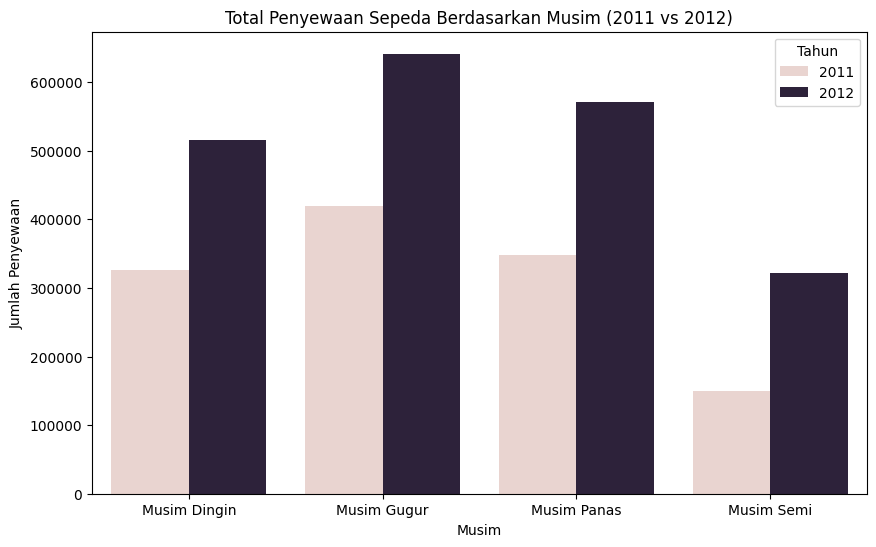

In [66]:
# Visualize the total bike rentals by season for 2011 and 2012
plt.figure(figsize=(10, 6))
sn.barplot(x='season_name', y='cnt', hue='year', data=seasonal_rentals, errorbar=None)
plt.title('Total Penyewaan Sepeda Berdasarkan Musim (2011 vs 2012)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Tahun')
plt.show()

In [60]:
# Display the percentage change
rentals_pivot[['season_name', 2011, 2012, 'percentage']]

year,season_name,2011,2012,percentage
0,Musim Dingin,326137,515476,58.06%
1,Musim Gugur,419650,641479,52.86%
2,Musim Panas,347316,571273,64.48%
3,Musim Semi,150000,321348,114.23%


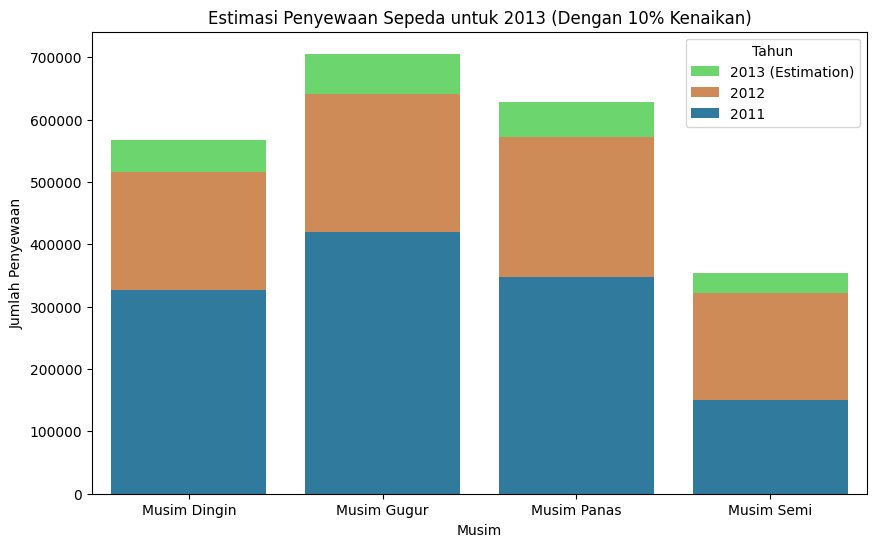

In [65]:
# Plot the bike rentals including the estimation for 2013
plt.figure(figsize=(10, 6))
sn.barplot(x='season_name', y='2013_estimation', data=rentals_pivot, color='#5ce65c', label='2013 (Estimation)')
sn.barplot(x='season_name', y=2012, data=rentals_pivot, color='#e28743', label='2012')
sn.barplot(x='season_name', y=2011, data=rentals_pivot, color='#1e81b0', label='2011')

plt.title('Estimasi Penyewaan Sepeda untuk 2013 (Dengan 10% Kenaikan)')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Tahun')
plt.show()

In [62]:
# Estimate the rentals for 2013 assuming a 10% increase from 2012
rentals_pivot['2013_estimation'] = rentals_pivot[2012] * 1.10

# Display the estimated rentals for 2013
rentals_pivot[['season_name', 2011, 2012, 'percentage_change', '2013_estimation']]

year,season_name,2011,2012,percentage_change,2013_estimation
0,Musim Dingin,326137,515476,58.055050,567023.6
1,Musim Gugur,419650,641479,52.860479,705626.9
2,Musim Panas,347316,571273,64.482201,628400.3
3,Musim Semi,150000,321348,114.232000,353482.8


### Pertanyaan 2, Bagaimana pola penyewaan sepeda di hari kerja dibandingkan akhir pekan atau hari libur?:

C:\Users\ferdi\AppData\Local\Temp\ipykernel_10376\1983935441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=summary, x='workingday', y='cnt', palette='viridis')


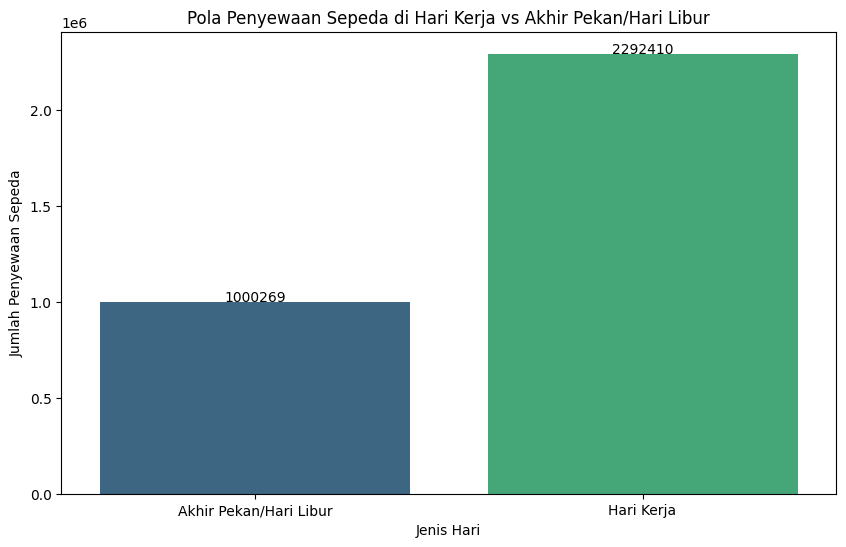

In [63]:
plt.figure(figsize=(10, 6))
sn.barplot(data=summary, x='workingday', y='cnt', palette='viridis')
plt.title('Pola Penyewaan Sepeda di Hari Kerja vs Akhir Pekan/Hari Libur')
plt.xlabel('Jenis Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
for index, row in summary.iterrows():
    plt.text(index, row['cnt'], f'{row["cnt"]}', color='black', ha="center")

plt.show()

## Conclusion

**Kesimpulan Pertanyaan 1**
- Musim Dingin:
Peningkatan sebesar 58.06% dari 326.137 penyewaan pada 2011 menjadi 515.476 pada 2012 dengan Estimasi penyewaan untuk 2013 adalah 567.023.
    - Analisis: Meskipun musim dingin umumnya memiliki permintaan yang lebih rendah, peningkatan signifikan ini menunjukkan adanya potensi pertumbuhan lebih lanjut.
- Musim Gugur:
Peningkatan sebesar 52.86% dari 419.650 penyewaan pada 2011 menjadi 641.479 pada 2012 dengan Estimasi penyewaan untuk 2013 adalah 705.627.
    - Analisis: Musim gugur menunjukkan pertumbuhan yang stabil, dan popularitas penyewaan sepeda masih cukup tinggi.
- Musim Panas:
Peningkatan sebesar 64.48% dari 347.316 penyewaan pada 2011 menjadi 571.273 pada 2012 dengan Estimasi penyewaan untuk 2013 adalah 628.400.
    - Analisis: Musim panas memiliki pertumbuhan yang kuat karena cuaca yang optimal untuk bersepeda. Ini merupakan musim yang paling strategis untuk promosi.
- Musim Semi:
Peningkatan paling signifikan, yaitu 114.23%, dari 150.000 penyewaan pada 2011 menjadi 321.348 pada 2012 dengan Estimasi penyewaan untuk 2013 adalah 353.483.
    - Analisis: Musim semi menunjukkan peningkatan yang luar biasa. Ini bisa disebabkan oleh promosi musiman atau faktor lain yang mendorong minat pelanggan.

**Kesimpulan Pertanyaan 2**
- Kesimpulan dari Visual diatas, Banyak pengguna menyewa sepeda untuk keperluan sehari-hari, seperti perjalanan ke tempat kerja, sekolah, atau aktivitas lain yang berkaitan dengan rutinitas harian mereka, Penurunan jumlah penyewa di hari libur menunjukkan bahwa penggunaan sepeda untuk kegiatan rekreasi atau hobi mungkin masih rendah. Ini bisa jadi karena faktor kurangnya promosi untuk penggunaan sepeda di akhir pekan, atau adanya alternatif transportasi lainnya. Jadi saran dari saya adalah Meningkatkan lagi promosi yang secara spesifik pada hari libur sehingga dapat menaikan pengguna atau penyewa di hari libur atau akhir pekan, Misalnya, tawarkan diskon atau paket khusus untuk penyewaan sepeda di akhir pekan.

## Output data bersih

In [64]:
day_df.to_csv("dashboard/data_bersih.csv", index=False)